In [2]:
## Análise do dataset Wine

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
names = ['class','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols'
          ,'proanthocyanins','color_intensity','hue','OD280_OD315_of_diluted_wines','proline']
data = pd.read_csv('../Data/wine.data', names=names)

In [5]:
data.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


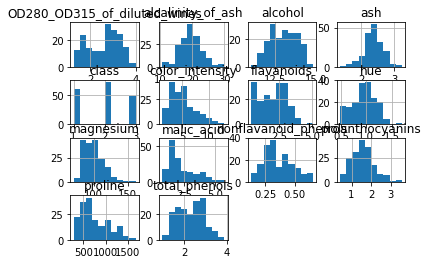

In [6]:
data.hist()
plt.show()

In [9]:
## Proporção das classes no dataset original
y = data.loc[:,"class"]
unicos = np.unique(y)
for i in range(len(unicos)):
    print("classe[" + str(unicos[i]) + "]: " + 
          str(len(np.where(y == unicos[i])[0]) / len(y)))
print("Total de elementos: " + str(len(y)))

classe[1]: 0.33146067415730335
classe[2]: 0.398876404494382
classe[3]: 0.2696629213483146
Total de elementos: 178


##### Como o trabalho é requerido ter apenas duas classes, vamos utilizar somente a classe 1 e 2 por terem mais instâncias

In [10]:
data_binario = data.loc[data["class"] != 3,:]
data_binario["class"].unique()

array([1, 2])

In [12]:
## Proporção das classes no dataset original
y = data_binario.loc[:,"class"]
unicos = np.unique(y)
for i in range(len(unicos)):
    print("classe[" + str(unicos[i]) + "]: " + 
          str(len(np.where(y == unicos[i])[0]) / len(y)))
print("Total de elementos: " + str(len(y)))

classe[1]: 0.45384615384615384
classe[2]: 0.5461538461538461
Total de elementos: 130


In [13]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [20]:
np.random.seed(42)

train_set, test_set = split_train_test(data_binario, 0.2)

X_train_set = train_set.iloc[:,1:]
Y_train_set = train_set.iloc[:,0:1]

X_test_set = test_set.iloc[:,1:]
Y_test_set = test_set.iloc[:,0:1]

print("trainSet: "+str(len(train_set))+" trainSet: "+str(len(test_set)))

trainSet: 104 trainSet: 26


In [22]:
log_reg = LogisticRegression()
log_reg.fit(X_train_set, Y_train_set)
Y_predicted_test_set = log_reg.predict(X_test_set)
Y_predicted_test_set = Y_predicted_test_set.reshape(len(Y_predicted_test_set),1)

/home/bkemmer/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
assert(Y_test_set.shape == Y_predicted_test_set.shape)

In [24]:
np.sum(np.equal(Y_test_set, Y_predicted_test_set)*1)/len(Y_test_set)

class    0.961538
dtype: float64

In [25]:
# Calculando a matriz de confusão das 3 classes
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(Y_test_set,Y_predicted_test_set)
conf_mx

array([[12,  1],
       [ 0, 13]])

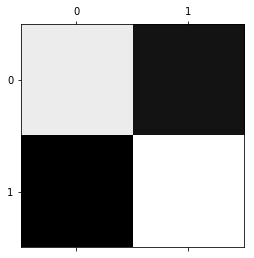

In [26]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()